In [1]:
import glob
import pandas as pd 
#from PIL import Image
import cv2
import numpy as np
import IPython
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# List of all the images
images = glob.glob('/Users/catherinebreen/Documents/Chapter 1/WRRsubmission/data/448res/SNEX20_TLI_resized_clean/**/*') 
labels = pd.read_csv('/Users/catherinebreen/Documents/Chapter 1/WRRsubmission/data/448res/SNEX20_TLI_resized_clean/snowPoles_resized_labels_clean.csv') ##*** DOUBLE CHEKC****###


FileNotFoundError: [Errno 2] No such file or directory: '/Users/catherinebreen/Documents/Chapter 1/WRRsubmission/data/448res/SNEX20_TLI_resized_clean/snowPoles_resized_labels_clean.csv'

In [ ]:
images_that_didnt_work =[]
imagesthatworked = []
top_row_img_cutoff = []
bot_row_img_cutoff= []

imgs = []

for image in tqdm(images): 
    img_name = image.split('/')[-1] ## the last part of the filename
    first_letter = img_name[0]
    ## look up image in the csv:

    top_x = float(labels.loc[labels['filename'] == img_name]['x1']) #x1
    top_y = float(labels.loc[labels['filename'] == img_name]['y1']) #y1
    bottom_x = float(labels.loc[labels['filename'] == img_name]['x2']) #x2
    bottom_y = float(labels.loc[labels['filename'] == img_name]['y2']) #y2
    imagesthatworked.append(img_name)
    
    ## create bounding boxes using the coordinates, although we will add a small buffer in the x direction only 
    top_left = [top_x - 2,top_y]
    top_right = [top_x + 2, top_y]
    bottom_left = [bottom_x + 2, bottom_y]
    bottom_right = [bottom_x - 2, bottom_y]

        # create empty image of the same dimensions as original image:
    img = cv2.imread(image)
    height, width, channels = img.shape
    zeros = np.zeros((width,height)) ## check to make sure this looks right on actual images

        #now set the bounding box within the empty image to 255 (can be converted to 1 later)
        # Define an array of endpoints of triangle
    points = np.array([top_left, top_right, bottom_left, bottom_right])
    
        # Use fillPoly() function and give input as
        # image, end points,color of polygon
        # Here color of polygon will blue
    masked = cv2.fillPoly(zeros, pts=np.int32([points]), color=(255, 0, 0)) ##np.int32([points])

        ## cropping based on camera type: 
    camDict = {'Reconyx':['C','T'],'Wingscape':['E','W']}
    if first_letter in camDict['Reconyx']:
        bottom_2 = round(height*(96/100)) ## 2%? 4 = 39
        top_2 =  round(height*(4/100)) ## 2%
        masked = masked[top_2:bottom_2,:] ## crop bottom 10% and top 10% (could make this 5%, and it would 24:424)
        img = img[top_2:bottom_2,:] ## pictures going upside down
        # plt.imshow(img)
        # break

    if first_letter in camDict['Wingscape']:
        bottom_10 = round(height*(93/100)) ## 7% is perfect! 
        masked = masked[0:bottom_10,:] ## crop bottom 10% and top 10% (could make this 5%, and it would 24:424)
        img = img[0:bottom_10,:] ## pictures going upside down

    # imgs.append(img)
    if np.sum(masked[0:1,:])>0: ## first row
            #print('top row cutoff')
        top_row_img_cutoff.append(img_name)
    if np.sum(masked[-1,:])>0:  #429:430
            #print('bottom row cutoff')
        bot_row_img_cutoff.append(img_name)

    #cv2.imwrite(f'/Volumes/CatBreen/CV4ecology/segmented_images_resized_cropped/mask_{img_name}', masked) #, binary * 255)
    #cv2.imwrite(f'/Volumes/CatBreen/CV4ecology/input_images_resized_cropped/{img_name}', img) #, binary * 255)

100%|██████████| 9721/9721 [02:09<00:00, 74.89it/s]


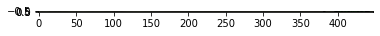

In [65]:
plt.imshow(img[-2:-1,:])

In [66]:
img[-2:-1,:]

array([[[180, 191, 159],
        [177, 188, 155],
        [174, 185, 153],
        ...,
        [121, 132,  92],
        [127, 132,  93],
        [127, 130,  91]]], dtype=uint8)

In [67]:
print(len(top_row_img_cutoff))
print(len(bot_row_img_cutoff))

0
0


In [60]:
bot_row_img_cutoff

['CHE6_IMG_0006.JPG',
 'CHE6_IMG_3293.JPG',
 'CHE6_IMG_2863.JPG',
 'CHE6_IMG_0126.JPG',
 'CHE6_IMG_0533.JPG',
 'CHE6_IMG_0408.JPG',
 'CHE6_IMG_0222.JPG',
 'CHE8_IMG_0127.JPG',
 'CHE8_IMG_0126.JPG',
 'CHE8_IMG_0124.JPG',
 'CHE8_IMG_0125.JPG',
 'CHE8_IMG_0008.JPG',
 'CHE8_IMG_0006.JPG',
 'CHE8_IMG_0007.JPG',
 'CHE2_IMG_0019.JPG',
 'CHE2_IMG_0018.JPG',
 'CHE2_IMG_0020.JPG',
 'CHE2_IMG_0021.JPG',
 'CHE2_IMG_0023.JPG',
 'CHE2_IMG_0022.JPG',
 'CHE2_IMG_1824.JPG',
 'CHE2_IMG_1822.JPG',
 'CHE2_IMG_1823.JPG',
 'CHE2_IMG_1821.JPG',
 'CHE2_IMG_1820.JPG',
 'CHE2_IMG_0016.JPG',
 'CHE2_IMG_0017.JPG',
 'CHE5_IMG_0595.JPG',
 'CHE5_IMG_0435.JPG',
 'CHE5_IMG_2394.JPG',
 'CHE5_IMG_0643.JPG',
 'CHE5_IMG_2903.JPG',
 'CHE5_IMG_0283.JPG',
 'CHE5_IMG_0067.JPG',
 'CHE5_IMG_0507.JPG',
 'CHE5_IMG_0211.JPG',
 'CHE5_IMG_0363.JPG',
 'CHE5_IMG_0002.JPG',
 'CHE5_IMG_0163.JPG']